In [1]:
import gdal
import numpy as np
from matplotlib.pyplot import imread
import numpy as np
from skimage import io
import scipy.stats
import os
#img = io.imread('image.png', as_gray=True)
import pandas as pd
input_path100="E:/Thesis/Data/roads/"
input_path50="E:/Thesis/Data/roads1/"
input_path200="E:/Thesis/Data/roads2/"
table={}
table['spearmanrC']=list()
#table['pearsonrP']=list()
#table['kendalltauP']=list()
#table['spearmanrP']=list()
table['ran']=list()

In [2]:
t1={}
t1['range']=list()
for i in range(-100,101,1):
    t1['range'].append(i*0.01)
print(t1['range'])
#print(len(t1['freq']))
#print(len(t1['range']))

[-1.0, -0.99, -0.98, -0.97, -0.96, -0.9500000000000001, -0.9400000000000001, -0.93, -0.92, -0.91, -0.9, -0.89, -0.88, -0.87, -0.86, -0.85, -0.84, -0.8300000000000001, -0.8200000000000001, -0.81, -0.8, -0.79, -0.78, -0.77, -0.76, -0.75, -0.74, -0.73, -0.72, -0.71, -0.7000000000000001, -0.6900000000000001, -0.68, -0.67, -0.66, -0.65, -0.64, -0.63, -0.62, -0.61, -0.6, -0.59, -0.58, -0.5700000000000001, -0.56, -0.55, -0.54, -0.53, -0.52, -0.51, -0.5, -0.49, -0.48, -0.47000000000000003, -0.46, -0.45, -0.44, -0.43, -0.42, -0.41000000000000003, -0.4, -0.39, -0.38, -0.37, -0.36, -0.35000000000000003, -0.34, -0.33, -0.32, -0.31, -0.3, -0.29, -0.28, -0.27, -0.26, -0.25, -0.24, -0.23, -0.22, -0.21, -0.2, -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12, -0.11, -0.1, -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02, -0.01, 0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 

In [3]:
def TestAndAppend(Image_x,Image_y):
    SC,SP=scipy.stats.pearsonr(Image_x.ravel(), Image_y.ravel())
    table['spearmanrC'].append(SC)
    if(np.isnan(SC)):
        table['ran'].append(-2.0)
    else:
        for j in range (202):
            if(SC<t1['range'][j]):
                table['ran'].append((t1['range'][j]))
                break

In [4]:
def DF(table):
    df=pd.DataFrame.from_dict(table)
    print(df.shape)
    print(df.describe())
    print(df.head())
    return df
def HIST_null(df):
    df.ran.hist()
    df1=df.groupby('ran').size().reset_index(name='Size')
    return df1
def HIST(df):
    df=df.drop(df.index[0])
    df.ran.hist()
    return df


In [5]:
def TEST(x,input_path):
    for i in range(0,1101,x):
         for j in range(0,1401,x):
            Image_x  = io.imread(input_path+"tile_"+str(i)+"_"+str(j)+".tif",as_gray=True)
            Image_y = io.imread(input_path+"gtile_"+str(i)+"_"+str(j)+".tif",as_gray=True)
            TestAndAppend(Image_x,Image_y)

In [6]:
TEST(50,input_path50)

C:\Users\ASUS\anaconda3\envs\TensorFlow-GPU\lib\site-packages\scipy\stats\stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


(667, 2)
       spearmanrC         ran
count  316.000000  667.000000
mean     0.311582   -0.902534
std      0.189334    1.164817
min     -0.103784   -2.000000
25%      0.171619   -2.000000
50%      0.321373   -2.000000
75%      0.453417    0.310000
max      0.818540    0.820000
   spearmanrC   ran
0         NaN -2.00
1         NaN -2.00
2    0.294360  0.30
3    0.289368  0.29
4    0.409482  0.41


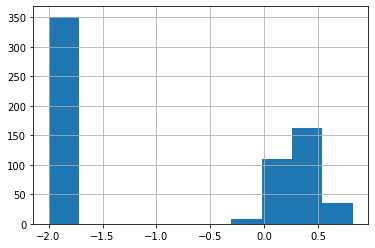

In [7]:
#df.pearsonrC.hist()
df=DF(table)
df51=HIST_null(df)


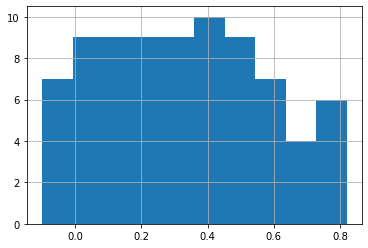

In [8]:
df52=HIST(df51)

In [9]:
table['spearmanrC'].clear()
table['ran'].clear()
TEST(100,input_path100)

(180, 2)
       spearmanrC        ran
count  104.000000  180.00000
mean     0.321797   -0.65550
std      0.162082    1.15905
min      0.003354   -2.00000
25%      0.181211   -2.00000
50%      0.327555    0.13000
75%      0.429659    0.37500
max      0.768355    0.77000
   spearmanrC   ran
0    0.388297  0.39
1    0.122372  0.13
2    0.417990  0.42
3    0.541683  0.55
4    0.281632  0.29


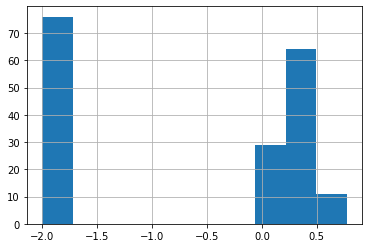

In [10]:
df100=DF(table)
df101=HIST_null(df100)

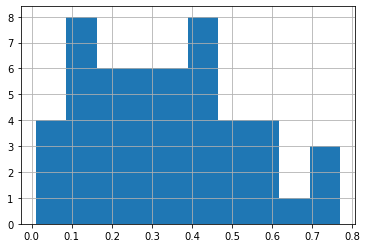

In [11]:
df102=HIST(df101)

In [12]:
table['spearmanrC'].clear()
table['ran'].clear()
TEST(200,input_path200)

(48, 2)
       spearmanrC        ran
count   34.000000  48.000000
mean     0.286595  -0.376875
std      0.112372   1.056794
min      0.059469  -2.000000
25%      0.243298  -2.000000
50%      0.285757   0.250000
75%      0.339662   0.322500
max      0.543545   0.550000
   spearmanrC   ran
0    0.274293  0.28
1    0.279573  0.28
2    0.327268  0.33
3    0.480288  0.49
4    0.504069  0.51


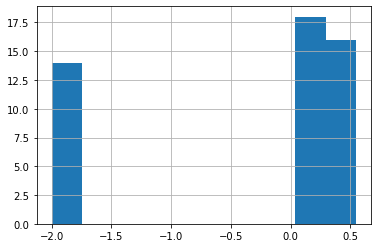

In [13]:
df200=DF(table)
df201=HIST_null(df200)

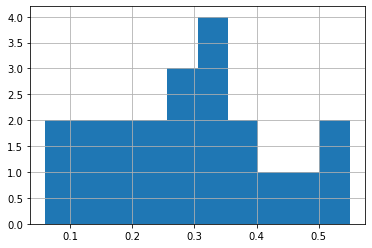

In [14]:
df202=HIST(df201)


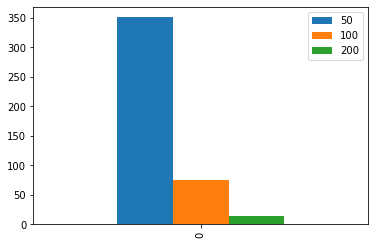

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
a=df51['Size'].iloc[0]
b=df101['Size'].iloc[0]
c=df201['Size'].iloc[0]
d =[ {
  "50": a,
  "100":b,
  "200":c
}]
pd.DataFrame(d, index=[0]).plot(kind='bar')
plt.show()



